# Introduction
This notebook presents the acoustic features used in the `wavely.signal` package.

In [1]:
%matplotlib notebook
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt
from wavely.signal.features.features import FeaturesComputer
from wavely.signal.units.helpers import split_signal

Spectral features in `wavely.signal.features.acousticfeatures` can have 1 or 2 decorators:
- `@feature`: it means that this feature is computed and returned in an instantiated object from `FeaturesComputer`,
- `@noexport`: it means that this feature is computed but is not available in the object.
Let's review the different available spectral features.


# 1D features

First we generate a linear chirp signal with frequencies ranging from 10Hz to 35kHz.

In [2]:
block_size = 256
rate = 96000.
window = np.hanning
fc = FeaturesComputer(
    block_size=block_size, 
    rate=rate, 
    window=window, 
    features=["spl", "ultrasoundlevel", "audiblelevel"]
)

t = np.arange(0.0, 100 * block_size / rate, 1 / rate)
x = chirp(t, 10, t[-1], 35000, 'linear')

blocks = split_signal(x, rate, block_size/rate)
features = fc.compute(blocks)

/home/maxime/Repositories/signal/wavely/signal/preprocessing/preprocessing.py:701: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


## Sound Pressure Level
The function `spl` computes the sound pressure level given the `rms` level using the following equation:

$L_P = 10\log_{10}\left(\frac{p^2}{p_0^2}\right)$

where $p$ (in Pa) is an RMS level and $p_0$ a reference level.

<IPython.core.display.Javascript object>


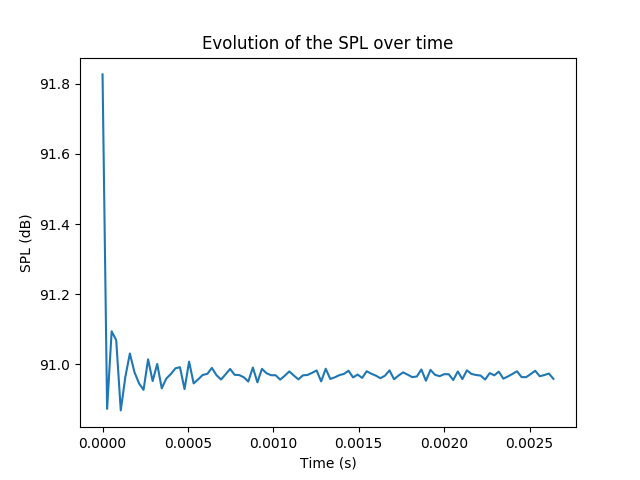

Text(0.5, 1.0, 'Evolution of the SPL over time')

In [3]:
n_frames = features["spl"].shape[0]
t_v = np.arange(0.0, block_size / rate, block_size / (rate * n_frames))
plt.figure(1)
plt.clf()
plt.plot(t_v, features["spl"])
plt.xlabel("Time (s)")
plt.ylabel("SPL (dB)")
plt.title("Evolution of the SPL over time")

## Ultrasound Level
The function `ultrasoundlevel` computes the ultrasound sound pressure level using spectral values.

<IPython.core.display.Javascript object>


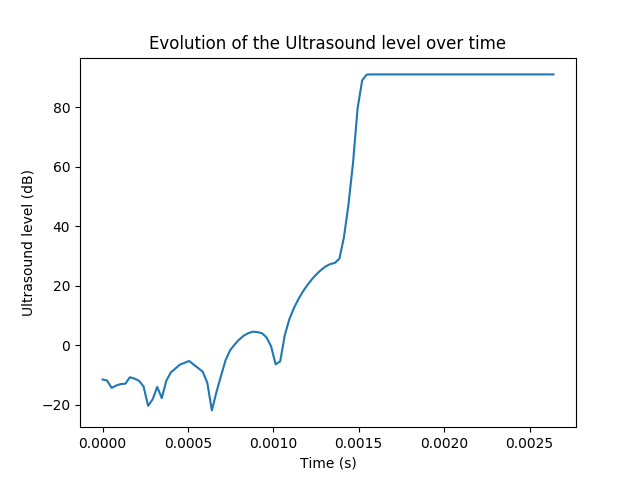

Text(0.5, 1.0, 'Evolution of the Ultrasound level over time')

In [4]:
n_frames = features["ultrasoundlevel"].shape[0]
t_v = np.arange(0.0, block_size / rate, block_size / (rate * n_frames))
plt.figure(2)
plt.clf()
plt.plot(t_v, features["ultrasoundlevel"])
plt.xlabel("Time (s)")
plt.ylabel("Ultrasound level (dB)")
plt.title("Evolution of the Ultrasound level over time")

## Audible Level
The function `audiblelevel` computes the audible sound pressure level using spectral values.

<IPython.core.display.Javascript object>


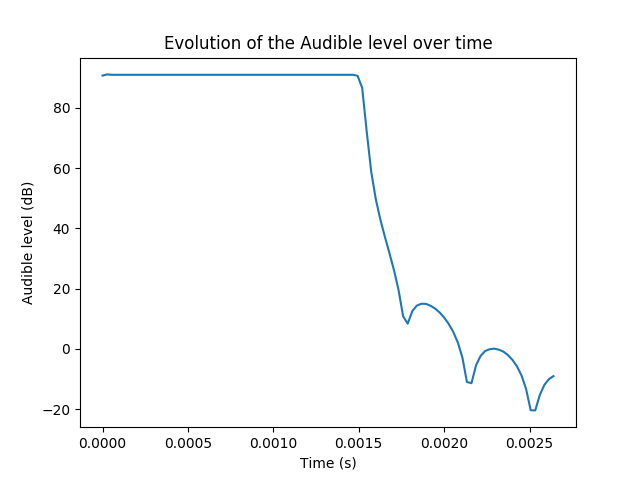

Text(0.5, 1.0, 'Evolution of the Audible level over time')

In [5]:
n_frames = features["audiblelevel"].shape[0]
t_v = np.arange(0.0, block_size / rate, block_size / (rate * n_frames))
plt.figure(3)
plt.clf()
plt.plot(t_v, features["audiblelevel"])
plt.xlabel("Time (s)")
plt.ylabel("Audible level (dB)")
plt.title("Evolution of the Audible level over time")

# 2D features 

In [6]:
block_size = 256
rate = 96000
window = np.hanning
fc = FeaturesComputer(
    block_size=block_size, 
    rate=rate, 
    window=window, 
    features=["bandleq", "bandflatness", "bandcrest"]
)
f = [1000, 30000]
x = np.sin(2 * np.pi * f[0] * np.arange(0.0, 10 * block_size / rate, 1 / rate)) + \
    np.sin(2 * np.pi * f[1] * np.arange(0.0, 10 * block_size / rate, 1 / rate))
features = fc.compute(x[: -(x.size % block_size) or None].reshape(-1, block_size))

## Band Leq
The function `bandleq` computes the Leq over frequency bands.

<IPython.core.display.Javascript object>


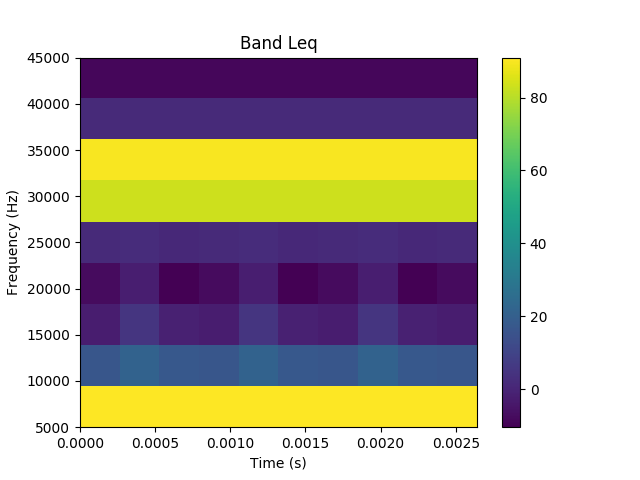

In [7]:
t_v = np.arange(0.0, block_size / rate, block_size / (rate * n_frames))
plt.figure(4)
plt.clf()
plt.imshow(
    features["bandleq"].T, 
    extent=[t_v[0], t_v[-1], fc.band_freq[-1], fc.band_freq[0]], aspect='auto'
)
plt.gca().invert_yaxis()
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Band Leq")
plt.colorbar()

## Band flatness
The function `bandflatness` computes the spectral flatness over frequency bands.

<IPython.core.display.Javascript object>


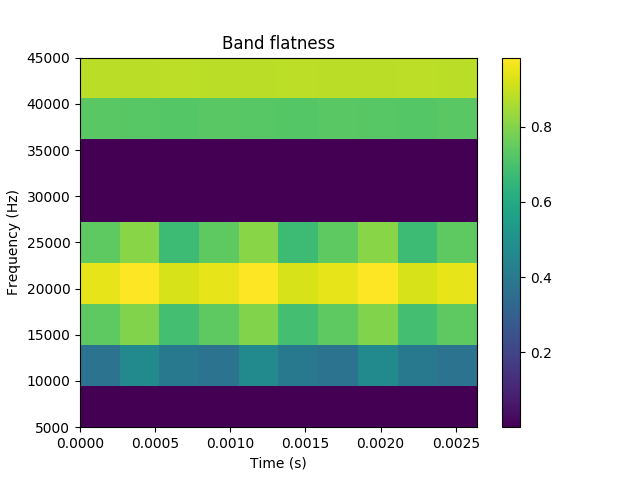

In [8]:
t_v = np.arange(0.0, block_size / rate, block_size / (rate * n_frames))
plt.figure(5)
plt.clf()
plt.imshow(
    features["bandflatness"].T, 
    extent=[t_v[0], t_v[-1], fc.band_freq[-1], fc.band_freq[0]], aspect='auto'
)
plt.gca().invert_yaxis()
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Band flatness")
plt.colorbar()

## Band crest
The function `bandcrest` computes the spectral crest over frequency bands.

<IPython.core.display.Javascript object>


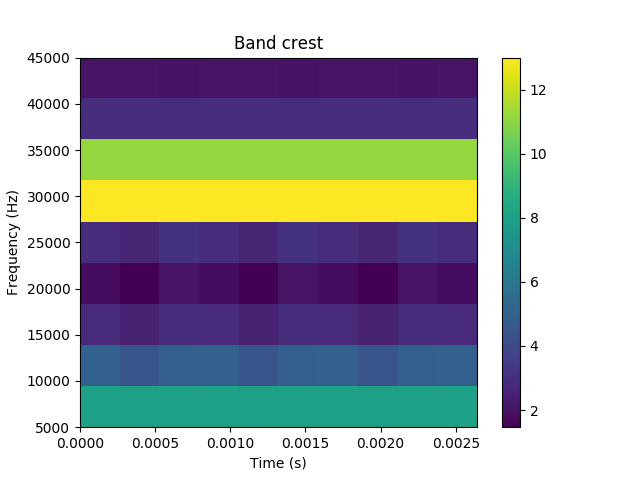

In [9]:
t_v = np.arange(0.0, block_size / rate, block_size / (rate * n_frames))
plt.figure(6)
plt.clf()
plt.imshow(
    features["bandcrest"].T, 
    extent=[t_v[0], t_v[-1], fc.band_freq[-1], fc.band_freq[0]], aspect='auto'
)
plt.gca().invert_yaxis()
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Band crest")
plt.colorbar()